In [296]:
import numpy as np

import pickle

import matplotlib.pyplot as plt

import nltk

import spacy
from spacy_langdetect import LanguageDetector

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [254]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)


In [ ]:
path = 'data/cleaned.npy'
arr = np.load(path, allow_pickle = True)



In [7]:
arr.shape

(40627, 4)

In [20]:
words = arr[:,3]

In [63]:
nlp = spacy.load("en")
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

lang = []
for idx, w in enumerate(words):
    if len(w)<4:
        lang.append(-1)
    else:
        doc = nlp(w)
        lang.append(doc._.language['language'])
    progress_bar = idx
    update_progress((idx+1) / len(words))
    




Progress: [####################] 100.0%


In [65]:
len(words)

40627

In [72]:
l =np.array(lang)
l.shape
l =l.reshape(-1,1)

In [77]:
arr2 = np.concatenate((arr,l), axis = 1 )

In [78]:
arr2.shape

(40627, 5)

In [81]:
arr2[3]

array([5, '1927303-mary', ('Paperback 9781435756342',),
       'Live love laugh a Lot is a special book.Interesting characters make you laugh- you must take a look.Voicing their opinions in humorous forms moving line by line.Entertaining to such an extent- you must take your time.Love the way Jacquelyn speaks through Sly Fox.Over and over you have to laugh as he comes out of his box.Very sly he tries to be from behind his cloth.Excitement on each page you must laugh a lot.Laughter rings out as Ingrid does her stuff.A woman who could finally say, “Enough is Enough”.Use me Lord Jacquelyn says on page fifty-eight.God’s blessings comes in many ways Jacquelyn points out to us.Honesty and humor you will find within these pages so much.A great read and must for every home.Live Love Laugh a lotOh how humorousThis book is written by Jacquelyn Sturge ',
       'en'], dtype=object)

In [340]:
#np.save("data/clean_and_lang", arr2) ## might need to do a mongo thing
np.save('data/english_arr',english )

(40627, 5)

array(['de', 'en', 'it', ..., 'en', 'en', 'en'], dtype=object)

In [89]:
u_languages, lang_counts  = np.unique(lang, return_counts = True)

#### get breakdown of the languages in the set

In [159]:
u_languages, lang_counts  = np.unique(lang, return_counts = True)
breakdown = [i for i in zip(u_languages, lang_counts)]
breakdown.sort(key = lambda t: t[1], reverse = True)

add = 0
for items in breakdown:
    add += items[1]

# breakdown

In [211]:
lang = arr2[:,-1]
lang.reshape(-1,1)
mask = np.array([True if i == 'en' else False for i in lang])
english = arr2[mask]
english.shape
#  english[0]

(39644, 5)

In [157]:
percent_english = english.shape[0]/arr.shape[0]
percent_english

0.9758042680975706

### Sort the reviews into star buckets

In [161]:
english[2]

array([5, '2009689-christina-jussaume', ('Paperback 9781435756342',),
       "Live, laugh, Love A LotJay’s limericks are entertainingYour smile will stay on face remainingPastor series is greatYou will appreciateReading muse you’ll not be complainingShe writes with humor on many thingsLoud hysterical laughter she bringsYour spirit she’ll raise highYou’ll read and often sigh She wrote with humor of wedding rings Humor brings out positive effectShe does write on many a subjectShe will enlighten youWords from her soul are trueShe will tell you smile as not perfectHer book I would highly recommendI think I’ll read it over againIt has beat that’s uniqueGet copy and take peekIt can be enjoyed like a best friend By Christina R Jussaume copyright 2009*This is a series of limericks for Jacqueline Sturge's first book__________________",
       'en'], dtype=object)

In [204]:
english[:0,0:-1]
english.shape

(39644, 5)

In [216]:
ratings = english[:, 0]
ratings.shape

(39644,)

In [232]:
r  = np.array([True if i == -1 else False for i in ratings]).reshape(-1,1)
rnot_rated_mask = np.concatenate((r, r, r, r,r), axis=1, out=None)

r1 = np.array([True if i == 1 else False for i in ratings]).reshape(-1,1)
r1_mask = np.concatenate((r1, r1, r1, r1,r1), axis=1, out=None)

r2 = np.array([True if i == 2 else False for i in ratings]).reshape(-1,1)
r2_mask = np.concatenate((r1, r1, r1, r1,r1), axis=1, out=None)

r3 = np.array([True if i == 3 else False for i in ratings]).reshape(-1,1)
r3_mask = np.concatenate((r1, r1, r1, r1,r1), axis=1, out=None)

r4 = np.array([True if i == 4 else False for i in ratings]).reshape(-1,1)
r4_mask = np.concatenate((r1, r1, r1, r1,r1), axis=1, out=None)

r5 = np.array([True if i == 5 else False for i in ratings]).reshape(-1,1)
r5_mask = np.concatenate((r1, r1, r1, r1,r1), axis=1, out=None)


array([[3, '2274182-carla', ('Paperback 9789306528',),
        "I'm kind of torn on how to rate this book. On one hand, there was a lot of focus on the semantics of the words and how different Arabic letters affect the meaning, and that part went completely over my head. The actual review of the ayat with explanation, I did find interesting and informing, but there were a lot of pages that I read and honestly didn't understand. I don't recommend this book to a new Muslim, but someone who has at least some knowledge of Arabic may benefit from it.",
        'en'],
       [5, '1927303-mary', ('Paperback 9781435756342',),
        'Live love laugh a Lot is a special book.Interesting characters make you laugh- you must take a look.Voicing their opinions in humorous forms moving line by line.Entertaining to such an extent- you must take your time.Love the way Jacquelyn speaks through Sly Fox.Over and over you have to laugh as he comes out of his box.Very sly he tries to be from behind his clo

In [233]:
not_rated = english[rnot_rated_mask]
rated_1 = english[r1_mask]
rated_2 = english[r2_mask]
rated_3 = english[r3_mask]
rated_4 = english[r4_mask]
rated_5 = english[r5_mask]

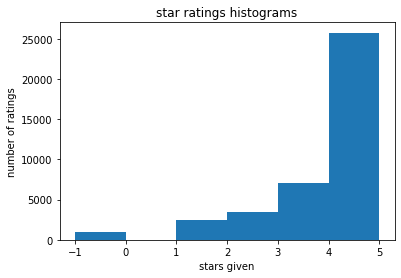

In [251]:

f, a = plt.subplots()
a.hist(ratings, bins = 6)
a.set_ylabel('number of ratings')
a.set_xlabel('stars given')
a.set_title('star ratings histograms')
plt.show()

In [255]:
def text_to_tokens(one):
    snowball = SnowballStemmer('english')
    tokenized = one.lower().split()
    e_stop = stopwords.words('english')
    without_stopw = [snowball.stem(word) for word in tokenized if word not in e_stop]

    return without_stopw

In [346]:
tfid = TfidfVectorizer(stop_words ='english', lowercase = True, )
tfidfed = tfid.fit_transform(words_english)

X = tfidfed
y = [i for i in ratings]


In [321]:
save_model(tfid, 'tfidvec_66')

array([3], dtype=object)

In [347]:
first_forest = RandomForestClassifier(min_samples_split = 10, oob_score=True, n_jobs =-1, n_estimators = 100)
first_forest.fit(X, y)
first_forest.oob_score_

0.6654727070931289

In [313]:
y_string = '''500 pages that are well organized, exceptionally edited and full of nothing new - it’s just said better, without histrionics and has lots of “dialogue”, from those who wish to remain anonymous...

Rucker and Leonnis clearly managed a gargantuan mountain of data to fill these pages. Collecting interviews, articles, tweets, news broadcasts, etc. for over 3 years to support this effort is mind boggling and they’re blessed to have had a great team. The effort is most evident in the spectacular index. It’s set up by person, place or event and every nuance you can imagine related to each. The Kindle version is interactive and will take you directly to the text.

The writing is clear, not very concise, in fact it’s verbose. The language is colorful, mostly on the part of POTUS, in his direct quotations, and there are a fair amount of them. There is an attempt at fairness altho’ the decided tenor of this tome is negative towards him. More credit is given to his faithful staff and for their willingness to serve, nobly. Much effort is given to creat first person accounts that permit the reader to decide rather than being dictated to.

Exhaustive and at times exhausting, but a good compendium of the facts thus far'''

tfidfed = tfid.transform([y_string])
prediction = first_forest.predict(tfidfed)


array([4])

In [293]:
save_model(tfid, 'tfidvec_66')

 c_g_rev_cleaner.py     geckodriver.log  'NLP experiment.ipynb'   samples.txt
'Cleaning Pipe.ipynb'   g_rev_scrape.py   progress.txt
 data		        models		  samples.py


In [315]:
def save_model(model,name):
    file_ext= '.sav'
    path = 'models/'
    pickle.dump(model, open(path+name+file_ext, 'wb'))


In [322]:
def predict_one(string, model_name, vectorizor_name):
    
    path = 'models/'
        
    tfid = pickle.load(open(path+vectorizor_name, 'rb'))
    tfidfed = tfid.transform([y_string])

    model = pickle.load(open(path+model_name, 'rb'))
    return model.predict(tfidfed)
    

In [330]:
string = " I dislike Trump as much as anyone but don’t be fooled, this book is little more than a rehash of news published widely over the past three years. Very little new, a waste of my time and money. Deeply disappointed. If you saw the pre-publication excerpts you got nearly all the new and interesting information. This book is horribly overrated. "
p = predict_one(string, 'rfoob66.sav', 'tfidvec_66.sav')
p

array([4])

In [331]:
string = "this was the best book ever"
p = predict_one(string, 'rfoob66.sav', 'tfidvec_66.sav')
p

array([4])

In [332]:
first_forest.predict(X)

array([3, 5, 5, ..., 5, 5, 4])

In [334]:
X[1]

<1x63457 sparse matrix of type '<class 'numpy.float64'>'
	with 55 stored elements in Compressed Sparse Row format>

In [336]:
import sklearn

"I'm kind of torn on how to rate this book. On one hand, there was a lot of focus on the semantics of the words and how different Arabic letters affect the meaning, and that part went completely over my head. The actual review of the ayat with explanation, I did find interesting and informing, but there were a lot of pages that I read and honestly didn't understand. I don't recommend this book to a new Muslim, but someone who has at least some knowledge of Arabic may benefit from it."

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split